# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement:

To model the demand for shared bikes with the available independent variables. 

Essentially, the company wants —


- to understand how exactly the demands vary with different features.

- accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

- understand the demand dynamics of a new market. 


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bikeSharing dataset

In [43]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [44]:
import numpy as np
import pandas as pd

Defining function to calculate VIF for all predictors to check multicollinearity in between all independent variables.

In [45]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def get_vif(train_df):
    vif = pd.DataFrame()
    vif['Features'] = train_df.columns
    vif['VIF'] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif = vif[vif['VIF']>5]
    return vif

In [46]:
bikeSharing_df = pd.read_csv("day.csv")

Check the sample dataset

In [47]:
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike dataframe

In [48]:
bikeSharing_df.shape

(730, 16)

We have total 730 days' data with 15 features.

In [49]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


None of the columns has null value.

In [50]:
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2- Cleaning the data

#### Dropping insignificant features
- `instant` and `date` will not be used in modelling as it is unique for each row and act like an index.
- `casual` and `registered` depends on our final target variable so will not be available at time of prediction.

In [51]:
bikeSharing_df.drop(['instant','dteday', 'registered', 'casual'], axis = 1, inplace = True)

#### Categorising featured as numerical & categorical

In [52]:
num = ['temp','atemp','hum','windspeed', 'cnt']
cat = ['weathersit', 'workingday', 'holiday', 'yr', 'season', 'mnth', 'weekday']

## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

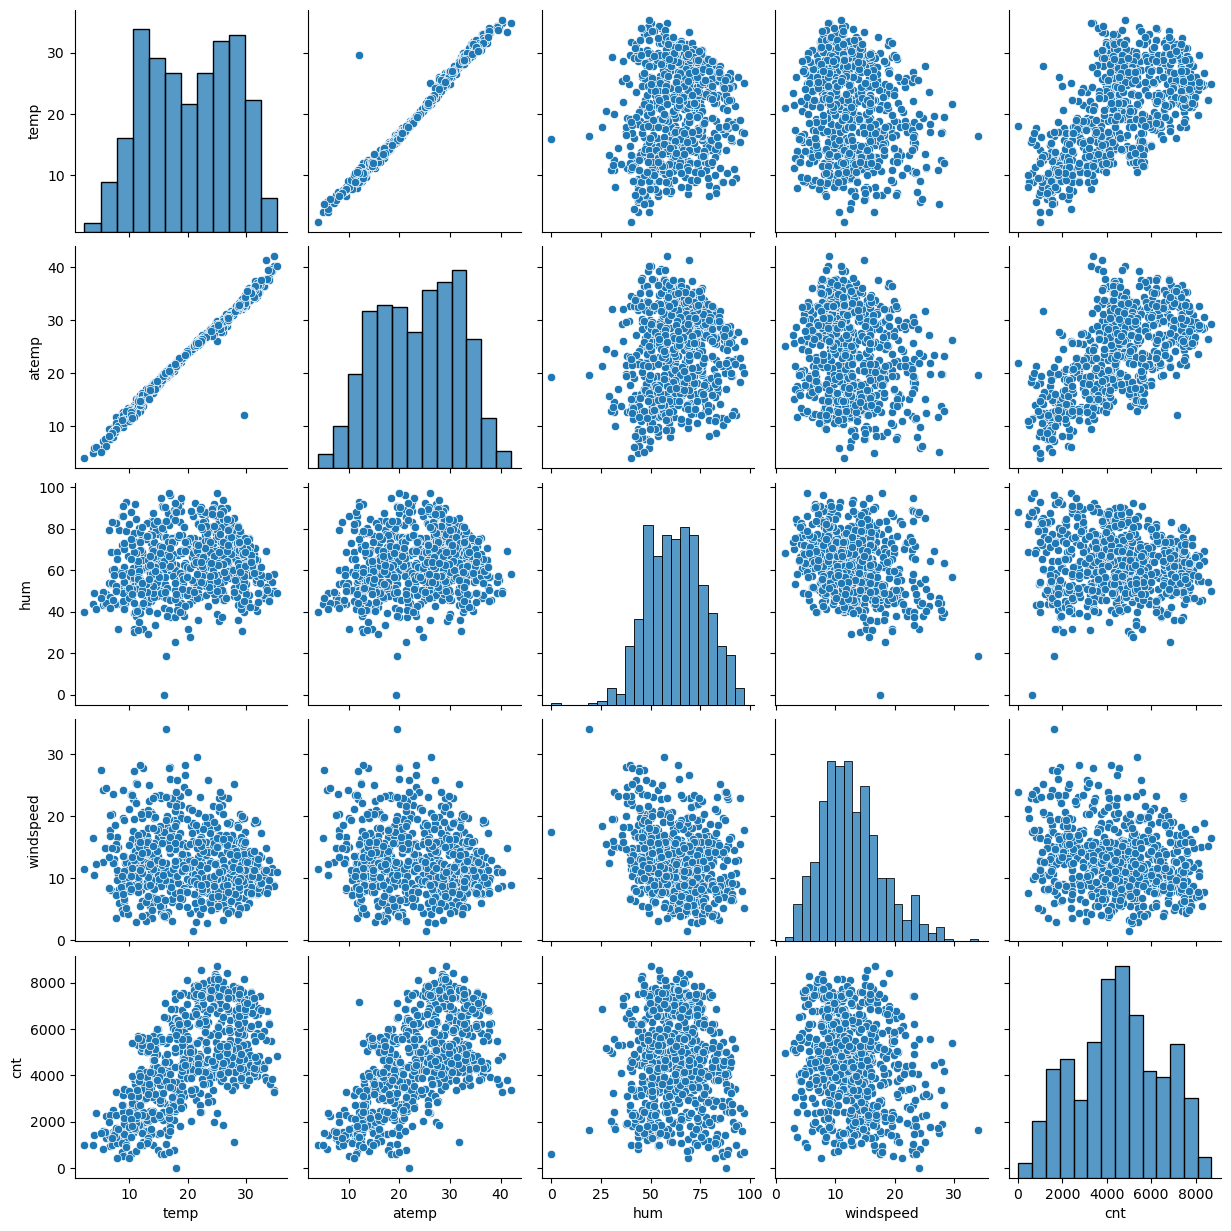

In [54]:
sns.pairplot(bikeSharing_df[num])
plt.show()

- 1. `atemp` and `temp` seems strongly correlated with each other giving us hint of multicollinearity.
- 2. `temp`, `atemp` features shows linear relationship with target variable cnt.

In [55]:
bikeSharing_df.drop(['temp'], axis = 1, inplace = True)

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

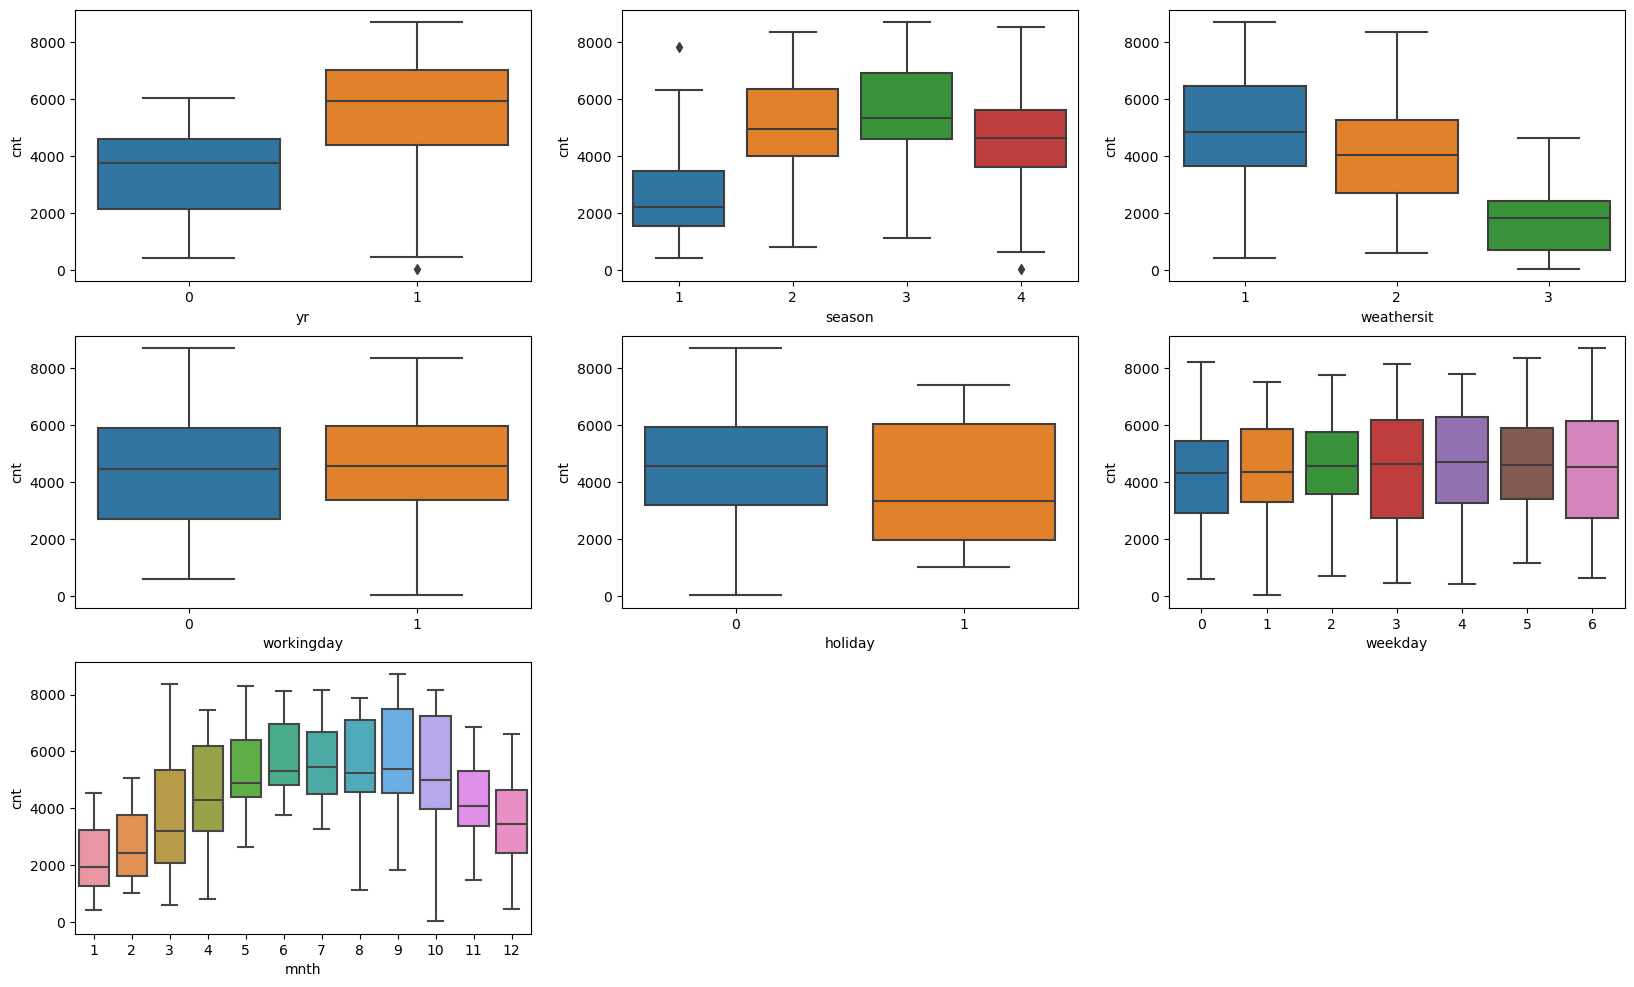

In [56]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeSharing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharing_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharing_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharing_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharing_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing_df)
plt.show()

- we see linear increase in bike rental in 2019 as compared to 2018.
- more bike rental are booked if it is a non-holiday.
- spring season records least booking.
- similarly booking volume drops down if weather situation is worsens.
- booking numbers are higher for month of April till October.

## Step 3: Data Preparation

- You can see that dataset has columns `season`, `mnth`, `weekday` and `weathersit` with numerical values.

- But these variable should be considered as categorical as it has no ordinal relation with our target variable, hence we will create dummy for these.

In [57]:
# List of variables to map
season =  {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
weathersit = {1:'good',2:'moderate',3:'bad',4:'severe'}
mnth= {1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}
weekday = {0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}

# Applying the function to the variable
bikeSharing_df['season'] = bikeSharing_df['season'].map(season)
bikeSharing_df['weathersit'] = bikeSharing_df['weathersit'].map(weathersit)
bikeSharing_df['mnth'] = bikeSharing_df['mnth'].map(mnth)
bikeSharing_df['weekday'] = bikeSharing_df['weekday'].map(weekday)

In [58]:
# Check the bike dataframe now
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,11.46350,43.6957,12.522300,1600


### Dummy Variables

We need to convert these categorical columns into integer for further processing. 

For this, we will use something called `dummy variables`.

In [59]:
# Get the dummy variables for these features.
bikeSharing = pd.get_dummies(bikeSharing_df, drop_first = True)

In [60]:
print(bikeSharing.shape)
print(bikeSharing.columns)

(730, 29)
Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [61]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Most of the features in our dataset are binary flags. and few of them are numerical. To get correct estimate of each faetures coefficient we will rescale all numerical feature.
- we will use MinMax scaling.

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
del num[num.index('temp')]
df_train[num] = scaler.fit_transform(df_train[num])

In [65]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


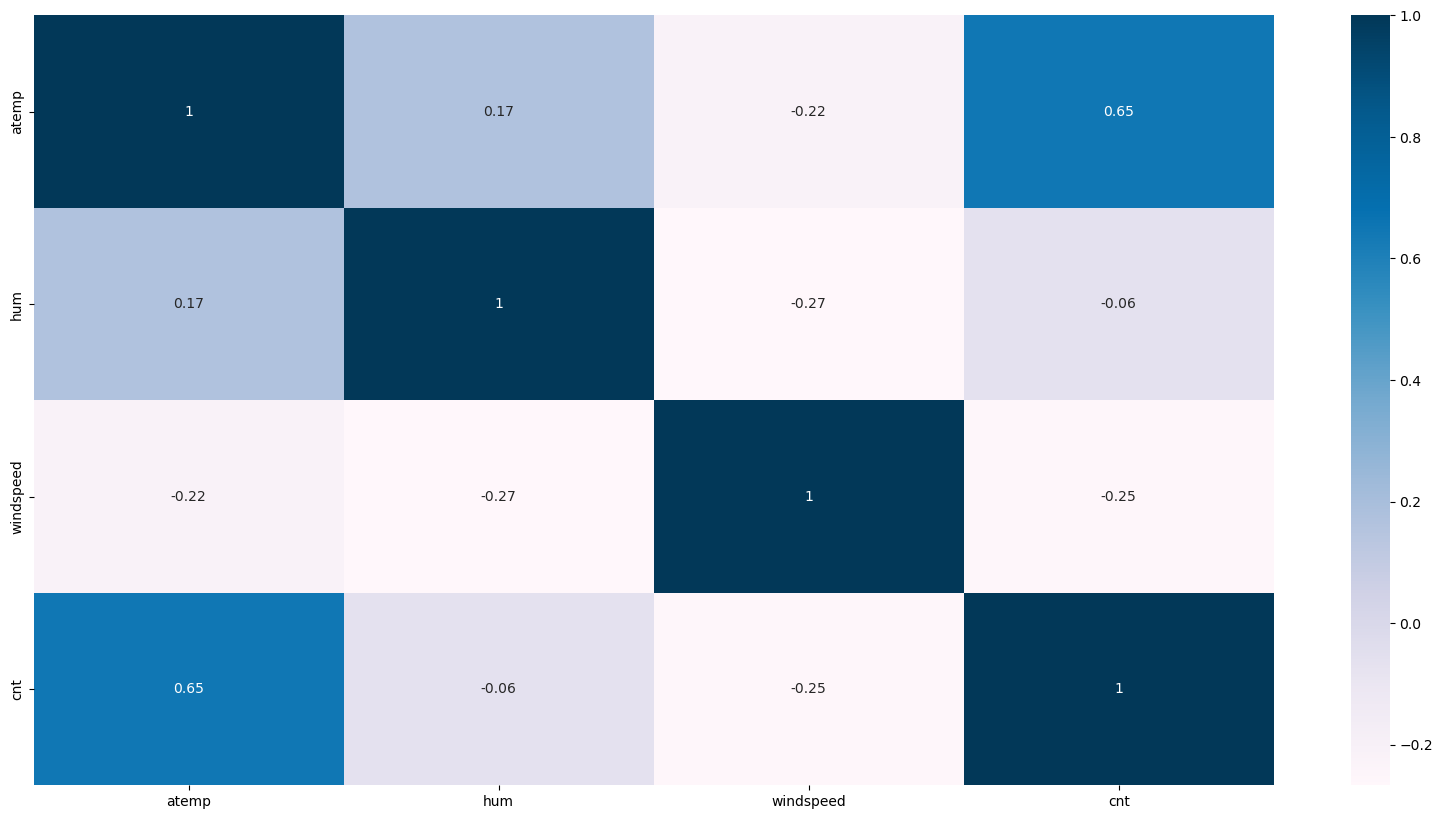

In [66]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train[num].corr(), annot = True, cmap = 'PuBu')
plt.show()

- `atemp` features shows around 65% correlation with target variable cnt.

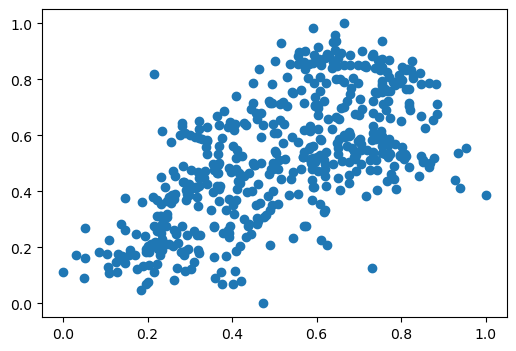

In [67]:
plt.figure(figsize=[6,4])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [68]:
y_train = df_train.pop('cnt')
X_train = df_train

In [69]:
X_train.shape

(510, 28)

We have total 28 features. To start feature selection, we will first use automatic feature selection methin called RFE. After that we can approach with manually elimination few insignificant features.

### Recursive feature elimination

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [71]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [72]:
print(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
print("\nSelected Features:")
col = X_train.columns[rfe.support_]
print(col)    

[('yr', True, 1), ('holiday', True, 1), ('workingday', False, 2), ('atemp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('season_spring', True, 1), ('season_summer', False, 5), ('season_winter', True, 1), ('mnth_aug', False, 6), ('mnth_dec', True, 1), ('mnth_feb', False, 3), ('mnth_jan', True, 1), ('mnth_jul', True, 1), ('mnth_jun', False, 7), ('mnth_mar', False, 14), ('mnth_may', False, 4), ('mnth_nov', True, 1), ('mnth_oct', False, 12), ('mnth_sept', True, 1), ('weekday_mon', False, 9), ('weekday_sat', True, 1), ('weekday_sun', False, 8), ('weekday_thu', False, 11), ('weekday_tue', False, 10), ('weekday_wed', False, 13), ('weathersit_good', True, 1), ('weathersit_moderate', True, 1)]

Selected Features:
Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')


Creating X_train dataframe with RFE selected variables

In [73]:
X_train_rfe = X_train[col]

## Step 5: Building a linear model
### Model 1

In [74]:
X_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sept,weekday_sat,weathersit_good,weathersit_moderate
653,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,1,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,1,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,1,0,1
728,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,1,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,1,0,1


Build a linear model with variable choosen in RFE

In [75]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())

get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          9.67e-187
Time:                        19:18:04   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1158    

,Features,VIF
3,hum,22.33
2,atemp,21.50
13,weathersit_good,13.26
14,weathersit_moderate,8.43


In [76]:
X = X_train_rfe.copy()

Looking at the p-values, it looks like some of the variables -  aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Model 2

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `weekday_sat` as it has a p value of `0.104`. Let's go ahead and drop this variables

In [77]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('weekday_sat', 1,)

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

get_vif(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          2.58e-187
Time:                        19:18:04   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1215    

,Features,VIF
3,hum,22.33
2,atemp,21.49
12,weathersit_good,13.24
13,weathersit_moderate,8.42


### Model 3

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high p values. Dropping `mnth_dec` as its pvalue is 0.007.

In [78]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_dec', 1,)

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary())

get_vif(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.3
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          7.11e-187
Time:                        19:18:04   Log-Likelihood:                 503.67
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     496   BIC:                            -920.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1153    

,Features,VIF
3,hum,21.80
2,atemp,19.97
11,weathersit_good,12.69
12,weathersit_moderate,8.24


### Model 4

### Dropping the variable and updating the model

We can still see some of them have a high p-value. `mnth_nov` for instance, has a p value of 0.072. We should drop this variable as well.

In [79]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_nov', 1,)

X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

get_vif(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.6
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          2.40e-187
Time:                        19:18:04   Log-Likelihood:                 502.00
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     497   BIC:                            -923.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1106    

,Features,VIF
3,hum,21.80
2,atemp,19.78
10,weathersit_good,12.57
11,weathersit_moderate,8.19


### Model 5

`mnth_jan` has p value of 0.031, so removing it to check model performance.

In [80]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_jan', 1,)

X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

print(lr_5.summary())

get_vif(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.9
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          1.57e-187
Time:                        19:18:04   Log-Likelihood:                 499.61
No. Observations:                 510   AIC:                            -975.2
Df Residuals:                     498   BIC:                            -924.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1030    

,Features,VIF
3,hum,21.33
2,atemp,18.64
9,weathersit_good,12.28
10,weathersit_moderate,8.06


### Model 6

From the summary, we can still see some of them have VIF value > 5. `hum` for instance, has a VIF 21.33. 

In [81]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', 1,)

X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

print(lr_6.summary())

get_vif(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          5.68e-185
Time:                        19:18:04   Log-Likelihood:                 490.70
No. Observations:                 510   AIC:                            -959.4
Df Residuals:                     499   BIC:                            -912.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0276    

,Features,VIF
2,atemp,12.23
8,weathersit_good,11.66
9,weathersit_moderate,6.43


### Model 7

From the summary, we can still see some of them have VIF value > 5. `weathersit_good` for instance, has a VIF 11.66. Not removing `atemp`, as it has visible correlation with the target variable. 

In [82]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('weathersit_good', 1,)

X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

print(lr_7.summary())

get_vif(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     205.7
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          7.78e-162
Time:                        19:18:04   Log-Likelihood:                 433.29
No. Observations:                 510   AIC:                            -846.6
Df Residuals:                     500   BIC:                            -804.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2423    

,Features,VIF


Finally we got a model with feature with VIF value less than 5 and all feature significant with ~0 p values.

## Step 6 -  Validating Linear Regression Assumption
- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals (absence of auto-correlation)
- Normality of Errors

### Linear Relationship

Assumption 1: Linear Relationship between the Target and the Feature

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.

In [84]:
y_train_pred = lr_7.predict(X_train_lm)

Text(0, 0.5, 'predicted')

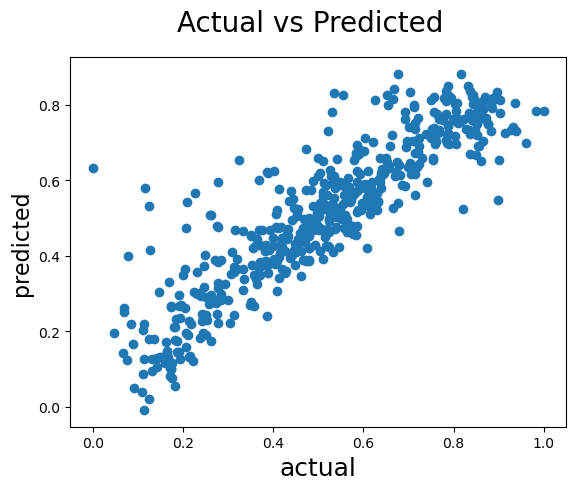

In [85]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('Actual vs Predicted', fontsize = 20)              # Plot heading 
plt.xlabel('actual', fontsize = 18)                          # X-label
plt.ylabel('predicted', fontsize = 16)  

### Homoscedasticity

Assumption 2 - The residuals have constant variance with respect to the dependent variable

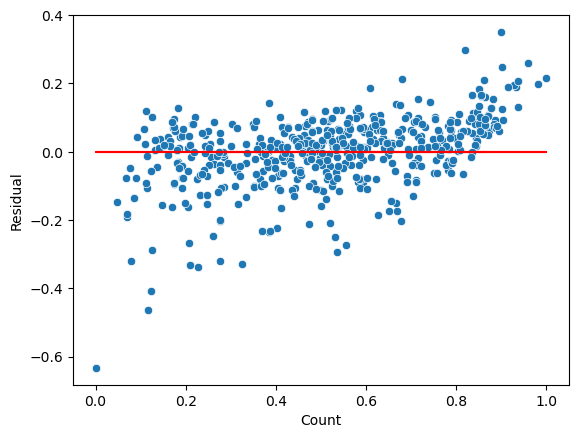

In [86]:
# Validating Homoscedasticity

sns.scatterplot(x = y_train,y = (y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see in the above plot, Homoscedasticity is well respected since the variance of the residuals are almost constant.

### Absence  of multicollinearity

Assumption 3 - all the independent variable in model has VIF score less than 5. As we know that high VIF score indicates multicollinearity we can say that predictor variable does not have multicollinearity.

In [87]:
get_vif(X) # prints feature with VIF score greater than 5.

,Features,VIF


### Autocorrelation in Residual

Assumption 4 - Autocorrelation refers to the fact that observations’ errors are correlated.
To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 


~~ The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables
(0–2: positive auto-correlation, 2–4: negative auto-correlation) 

In [88]:

print('The Durbin-Watson value for Model is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Model is 2.0254


There is almost nill auto-correlation

### Normality if Residual Analysis

Assumption 5 - To check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [89]:
y_train_price = lr_7.predict(X_train_lm)

Text(0.5, 0, 'Errors')

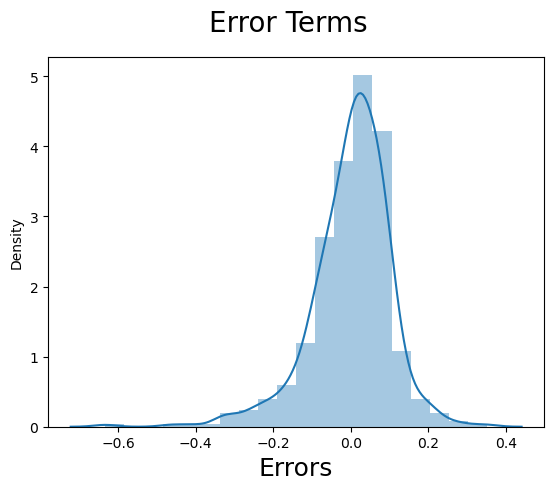

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. seventh model.

#### Applying the scaling on the test sets

In [91]:
df_test[num] = scaler.transform(df_test[num])

In [93]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.319635
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [94]:
y_test = df_test.pop('cnt')
X_test = df_test

Adding constant variable to test dataframe after filtering out eliminated feature.

In [95]:
col1=X.columns
X_test=X_test[col1]
X_test_ = sm.add_constant(X_test)
X_test_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                219 non-null    float64
 1   yr                   219 non-null    int64  
 2   holiday              219 non-null    int64  
 3   atemp                219 non-null    float64
 4   windspeed            219 non-null    float64
 5   season_spring        219 non-null    uint8  
 6   season_winter        219 non-null    uint8  
 7   mnth_jul             219 non-null    uint8  
 8   mnth_sept            219 non-null    uint8  
 9   weathersit_moderate  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


In [96]:
X_test_.shape

(219, 10)

In [97]:
# Making predictions using the seventh model
y_pred_m7 = lr_7.predict(X_test_)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

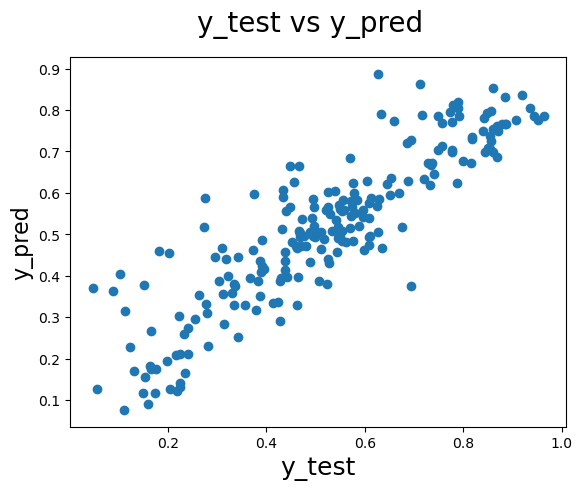

In [98]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m7)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### R-square for test data 

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m7)

0.780493251393642

In [100]:
lr_7.params

const                  0.242316
yr                     0.240514
holiday               -0.081677
atemp                  0.478957
windspeed             -0.153159
season_spring         -0.111629
season_winter          0.027719
mnth_jul              -0.072690
mnth_sept              0.049031
weathersit_moderate   -0.068409
dtype: float64

### Model Equation

We can see that the equation of our best fitted line is:

$ cnt = 0.24  \times  yr + (-0.08)  \times  holiday + 0.47 \times atemp + (-0.15) \times windspeed + (-0.11) \times seasonspring + 0.02 \times season_winter + (-0.07) \times mnthjul + 0.05 \times mnthsept + (-0.06) \times weathersitmoderate + 0.24 $

### Model Performance Summary

In [69]:
print('R-Squared score for model is ', round(lr_7.rsquared,2))
print('Adjusted R-Squared score for model is ', round(lr_7.rsquared_adj,2))
print('R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_pred_m7),2))

R-Squared score for model is  0.79
Adjusted R-Squared score for model is  0.78
R-Squared score of the model for the predicted values is 0.78


## Insights

##### Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Build a non-linear model
2. Add new features like past bike availabilty, area etc.

Model Insights:
1. Positive relation with year. It shows bike rental has increased over the year.
2. Strong positive relation with feeling temperature.
3. Negative relation with windspeed & spring season.

Business Insights:
Business should focus on bike availability when temp feels hotter and its winter season.